# Programa Ingenias+ Data Science

---

# PRE-ENTREGA 2  

**Grupo 16**

Belen Massuco - Andrea Rodriguez

---


**Tema y dataset seleccionado**

Para nuestro proyecto final, seleccionamos un dataset de estadísticas agrícolas históricas de Argentina, proveniente del portal oficial del Ministerio de Agricultura. Este dataset incluye registros desde el ciclo agrícola 1969/1970 hasta 2022/2023, con información organizada por provincia y departamento. Las variables principales son:

 * provincia_nombre: Nombre de la provincia
 * departamento_nombre: Nombre del departamento
 * cultivo: Nombre del cultivo   
 * ciclo: Año de la campaña
 * sup_sembrada: Cantidad de superficie semabrada en hectareas
 * sup_cosechada: Cantidad de superficie cosechada en hectareas
 * produccion: Cantidad de produccion en toneladas
 * rendimiento: Cantidad de rendimiento en kilos por hectarea

Fuente dataset: https://datos.magyp.gob.ar/dataset/estimaciones-agricolas

**Objetivo del trabajo**

El objetivo del proyecto es analizar la evolución de la producción agrícola en distintas regiones del país a lo largo del tiempo. Nos enfocamos en identificar tendencias en los rendimientos, variaciones en la superficie sembrada y cosechada, y diferencias regionales por cultivo.

**Exploración y transformación de datos con Pandas**

Comenzamos explorando la estructura general del dataset: contiene más de 150.000 registros y 12 features originales con información sobre cultivos, superficie y producción a nivel departamental. Identificamos que algunas columnas clave como sup_cosechada, produccion y rendimiento estaban almacenadas como texto y contenían valores no numéricos como "SD", lo que dificultaba los análisis cuantitativos.

Realizamos limpieza de datos faltantes, conversión de tipos de datos, renombramos features y creamos nuevas.

**Visualización inicial de datos**

A través de gráficos exploratorios buscamos identificar patrones y relaciones entre variables: heatmap de correlación, series temporales, gráficos de barra y visualización regional con mapas.

## Importar librerias y dataset

In [ ]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.impute import SimpleImputer

In [ ]:
# Importar dataset
ea = pd.read_csv("/content/estimaciones_agricolas.csv", encoding='latin1', delimiter=',', dtype={9: object, 10: object, 11: object})
# Las features 9, 10 y 11 tienen valores numéricos y texto. Se especifica para evitar el warning

## Explorar dataset

In [ ]:
# Mostrar primeras filas
ea.head()

,provincia_id,provincia_nombre,departamento_id,departamento_nombre,id_cultivo,cultivo,id_ciclo,ciclo,sup_sembrada,sup_cosechada,produccion,rendimiento
0,6,Buenos Aires,854,25 de Mayo,1.0,Ajo,1,1969/1970,3,3,10,3333
1,6,Buenos Aires,14,Adolfo Gonzales Chaves,1.0,Ajo,1,1969/1970,15,15,82,5467
2,6,Buenos Aires,21,Alberti,1.0,Ajo,1,1969/1970,5,5,7,1400
3,6,Buenos Aires,28,Almirante Brown,1.0,Ajo,1,1969/1970,2,2,8,4000
4,6,Buenos Aires,77,Arrecifes,1.0,Ajo,1,1969/1970,6,6,15,2500


In [ ]:
# Mostrar cantidad de filas y features
ff = ea.shape
print(f'El dataset contiene {ff[0]} filas y {ff[1]} features.')

El dataset contiene 153889 filas y 12 features.


In [ ]:
# Ver tipos de datos
ea.dtypes

,0
provincia_id,int64
provincia_nombre,object
departamento_id,int64
departamento_nombre,object
id_cultivo,float64
cultivo,object
id_ciclo,int64
ciclo,object
sup_sembrada,int64
sup_cosechada,object


In [ ]:
# Mostrar nombres de las features
ea.columns

Index(['provincia_id', 'provincia_nombre', 'departamento_id',
       'departamento_nombre', 'id_cultivo', 'cultivo', 'id_ciclo', 'ciclo',
       'sup_sembrada', 'sup_cosechada', 'produccion', 'rendimiento'],
      dtype='object')

In [ ]:
# Renombrar features - agregar unidades
ea.rename(columns={'sup_sembrada': 'sup_sembrada_ha', 'sup_cosechada': 'sup_cosechada_ha', 'produccion': 'produccion_ton', 'rendimiento':'rendimiento_kg/ha'}, inplace=True)

In [ ]:
# Chequeo de cambio de nombres
ea.columns

Index(['provincia_id', 'provincia_nombre', 'departamento_id',
       'departamento_nombre', 'id_cultivo', 'cultivo', 'id_ciclo', 'ciclo',
       'sup_sembrada_ha', 'sup_cosechada_ha', 'produccion_ton',
       'rendimiento_kg/ha'],
      dtype='object')

## Manejo de valores nulos

Se detectaron valores faltantes en el dataset en la feature id_ciclo. Estos valores deben ser tratados para evitar errores en el análisis posterior.



In [ ]:
# Contar valores nulos y mostrar porcentaje
missing_data = pd.DataFrame({'Valores nulos': ea.isnull().sum(), 'Porcentaje (%)': (ea.isnull().sum() / len(ea)) * 100})
missing_data.sort_values(by='Valores nulos', ascending=False)

,Valores nulos,Porcentaje (%)
id_cultivo,1069,0.694657
provincia_id,0,0.000000
departamento_id,0,0.000000
provincia_nombre,0,0.000000
departamento_nombre,0,0.000000
cultivo,0,0.000000
id_ciclo,0,0.000000
ciclo,0,0.000000
sup_sembrada_ha,0,0.000000
sup_cosechada_ha,0,0.000000


La feature 'id_cultivo' tiene 1069 valores faltantes.



In [ ]:
# Chequeo para saber cuáles cultivos tiene el dato de id faltante (0 indica que no tiene id_cultivo asignado )
ea.groupby("cultivo")["id_cultivo"].nunique().sort_values(ascending=True)

,id_cultivo
cultivo,
Arveja,0
Garbanzo,0
Poroto alubia,0
Lenteja,0
Poroto negro,0
Poroto otros,0
Poroto total,0
Alpiste,1
Caña de azúcar,1


Los cultivos que tienen dato id faltante son: arveja, garbanzo, poroto alubia, lenteja, poroto negro, poroto otros y poroto total.

In [ ]:
# Control para saber a partir de que valor nombrar los id_cultivo
np.sort(ea['id_cultivo'].unique())

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., nan])

In [ ]:
# Filtrar los cultivos que no tienen ningún id_cultivo (NaN)
cultivos_sin_id = ea[ea["id_cultivo"].isna()]["cultivo"].dropna().unique()

# Asignar un nuevo ID ficticio a cada uno (elegimos desde 36)
nuevos_ids = {cultivo: 36 + i for i, cultivo in enumerate(cultivos_sin_id)}

# Crear un diccionario con los cultivos que ya tenían id_cultivo válido
# (solo uno por cultivo, eliminando duplicados)
mapa_existente = ea.dropna(subset=["id_cultivo"]).drop_duplicates(subset=["cultivo"])[["cultivo", "id_cultivo"]]
diccionario_existente = dict(zip(mapa_existente["cultivo"], mapa_existente["id_cultivo"]))

# Combinar los dos diccionarios (IDs reales + IDs nuevos)
diccionario_completo = {**diccionario_existente, **nuevos_ids}

# Usar map() para asignar el ID correcto a cada fila según el nombre del cultivo
ea["id_cultivo"] = ea["cultivo"].map(diccionario_completo)


In [ ]:
# Chequeo que cada uno de los cultivos tenga ID único
ea.groupby("cultivo")["id_cultivo"].nunique().sort_values(ascending=True)

,id_cultivo
cultivo,
Ajo,1
Algodón,1
Alpiste,1
Arroz,1
Arveja,1
Avena,1
Banana,1
Caña de azúcar,1
Cebada cervecera,1


In [ ]:
# Chequeo ids nuevos
np.sort(ea['id_cultivo'].unique())

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42.])

In [ ]:
# Contar valores nulos y mostrar porcentaje (chequeo)
missing_data = pd.DataFrame({'Valores nulos': ea.isnull().sum(), 'Porcentaje (%)': (ea.isnull().sum() / len(ea)) * 100})
missing_data.sort_values(by='Valores nulos', ascending=False)

,Valores nulos,Porcentaje (%)
provincia_id,0,0.0
provincia_nombre,0,0.0
departamento_id,0,0.0
departamento_nombre,0,0.0
id_cultivo,0,0.0
cultivo,0,0.0
id_ciclo,0,0.0
ciclo,0,0.0
sup_sembrada_ha,0,0.0
sup_cosechada_ha,0,0.0


## Manejo de datos faltantes

Ya que estos valores deben ser tratados para evitar errores en el análisis posterior, se considera implementar imputación de datos faltantes.  


In [ ]:
# Ver filas sin datos (SD)
ea[ea.eq('SD').any(axis=1)]

,provincia_id,provincia_nombre,departamento_id,departamento_nombre,id_cultivo,cultivo,id_ciclo,ciclo,sup_sembrada_ha,sup_cosechada_ha,produccion_ton,rendimiento_kg/ha
139560,6,Buenos Aires,56,Bahia Blanca,32.0,Maíz,49,2017/2018,2200,SD,SD,SD
140106,90,Tucuman,98,Tafi del Valle,32.0,Maíz,49,2017/2018,100,100,SD,SD
140258,74,San Luis,28,Chacabuco,36.0,Poroto total,49,2017/2018,100,SD,SD,SD
141809,6,Buenos Aires,49,Azul,26.0,Sorgo,49,2017/2018,520,SD,SD,SD
141811,6,Buenos Aires,56,Bahia Blanca,26.0,Sorgo,49,2017/2018,850,SD,SD,SD
141815,6,Buenos Aires,84,Benito Juarez,26.0,Sorgo,49,2017/2018,700,SD,SD,SD
141841,6,Buenos Aires,182,Coronel de Marina L Rosales,26.0,Sorgo,49,2017/2018,900,SD,SD,SD
141877,6,Buenos Aires,476,Loberia,26.0,Sorgo,49,2017/2018,880,SD,SD,SD
141894,6,Buenos Aires,602,Patagones,26.0,Sorgo,49,2017/2018,2000,SD,SD,SD
141936,6,Buenos Aires,791,Tandil,26.0,Sorgo,49,2017/2018,800,SD,SD,SD


In [ ]:
# Contar filas sin datos (SD)
ea.eq('SD').any(axis=1).sum()

np.int64(14)

In [ ]:
# Existen celdas que no tienen datos en las features sup_cosechada, sup_sembrada, produccion y rendimiento.
# Ver cuántos valores 'SD' (sin datos) aparecen en cada feature
print(f"Las filas sin datos (SD) en 'sup_cosechada' son {ea[ea['sup_cosechada_ha'] == 'SD'].shape[0]}")
print(f"Las filas sin datos (SD) en 'sup_sembrada' son {ea[ea['sup_sembrada_ha'] == 'SD'].shape[0]}")
print(f"Las filas sin datos (SD) en 'produccion' son {ea[ea['produccion_ton'] == 'SD'].shape[0]}")
print(f"Las filas sin datos (SD) en 'rendimiento' son {ea[ea['rendimiento_kg/ha'] == 'SD'].shape[0]}")

Las filas sin datos (SD) en 'sup_cosechada' son 13
Las filas sin datos (SD) en 'sup_sembrada' son 0
Las filas sin datos (SD) en 'produccion' son 14
Las filas sin datos (SD) en 'rendimiento' son 14


Se considera imputar los valores faltantes

In [ ]:
#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer
#from sklearn.preprocessing import OrdinalEncoder

# Detectar antes de imputar
#cols_a_imputar = ['sup_cosechada_ha', 'rendimiento_kg/ha']
#ea["imputado"] = ea[cols_a_imputar].replace("SD", np.nan).isna().all(axis=1)

# Reemplazar 'SD' con NaN
#ea[cols_a_imputar] = ea[cols_a_imputar].replace("SD", np.nan).apply(pd.to_numeric, errors='coerce')

# Definir columnas categóricas y numéricas
#categoricas = ['provincia_nombre', 'departamento_nombre']
#numericas = ['sup_cosechada_ha', 'rendimiento_kg/ha']

#encoder = OrdinalEncoder()
#ea[categoricas] = encoder.fit_transform(ea[categoricas])

#columnas_modelo = categoricas + numericas

# Hacemos copia para no tocar ea original
#ea_imputada = ea.copy()

#for cultivo_id in ea['cultivo'].unique():
    #subset = ea[ea['cultivo'] == cultivo_id].copy()

    #if subset[numericas].isna().sum().sum() == 0:
        #continue

    # Imputador
    #imputer = IterativeImputer(random_state=42, max_iter=10)
    #subset[columnas_modelo] = imputer.fit_transform(subset[columnas_modelo])

    # Volvemos a colocar en el dataframe original
    #ea_imputada.loc[subset.index, columnas_modelo] = subset[columnas_modelo]

    # Calcular producción
    #subset["produccion_ton"] = subset["sup_cosechada_ha"] * subset["rendimiento_kg/ha"] / 1000

    # Reemplazar
    #ea_imputada.loc[subset.index, columnas_modelo + ["produccion_ton"]] = subset[columnas_modelo + ["produccion_ton"]]


Chequeo si los valores imputados se corresponden con los valores medios de cada provincia

In [ ]:
# Superficie cosechada por provincia
#plt.figure(figsize=(12, 6))
#sns.boxplot(x="provincia_nombre", y="sup_cosechada_ha", data=ea_imputada, showfliers=False)
#sns.scatterplot(x="provincia_nombre", y="sup_cosechada_ha", data=ea_imputada[ea_imputada["imputado"] == True], color="red", s=130, zorder=10, label="Imputados")
#plt.title("Comparación de superficie cosechada por provincia (imputados en rojo)")
#plt.xticks(rotation=90)
#plt.legend()
#plt.tight_layout()
#plt.show()

Los valores imputados se superficie cosechada son outliers sobretodo para las provincias con id 17 y 22. Se decide no considerar las filas SD en sup_cosechada_ha.

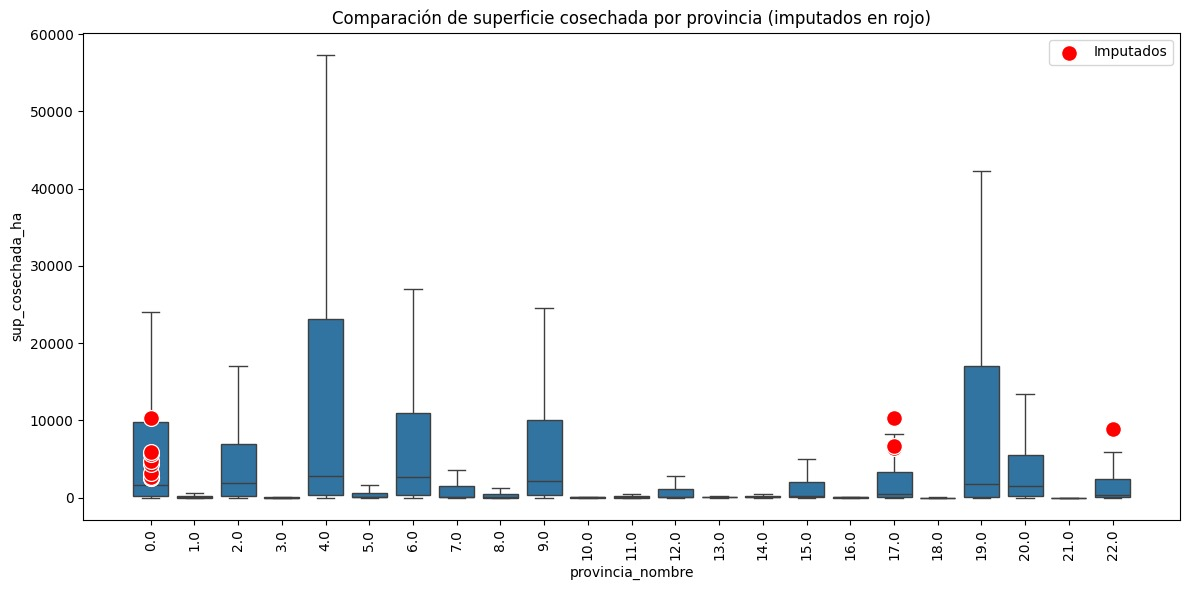

In [ ]:
# Rendimiento por provincia
#plt.figure(figsize=(12, 6))
#sns.boxplot(x="provincia_nombre", y="rendimiento_kg/ha", data=ea_imputada, showfliers=False)
#sns.scatterplot(x="provincia_nombre", y="rendimiento_kg/ha", data=ea_imputada[ea_imputada["imputado"] == True], color="red", s=130, zorder=10, label="Imputados")
#plt.title("Comparación de rendimiento por provincia (imputados en rojo)")
#plt.xticks(rotation=90)
#plt.legend()
#plt.tight_layout()
#plt.show()

Si bien los valores imputados del feature rendimiento se presentan en el rango normal de los datos, tampoco se van a considerar ya que la feature produccion igual tendria valores outliers.

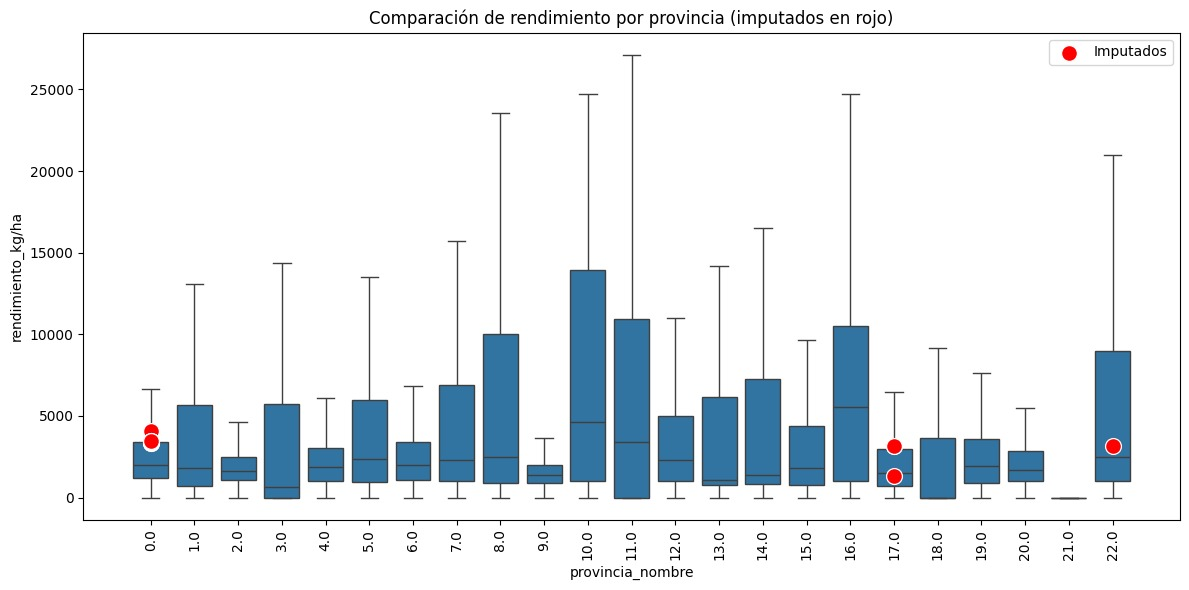

Se decidió que se eliminan las filas donde todas las variables (sup_cosechada_ha, produccion_ton, rendimiento_kg/ha) están vacías (con valor "SD"), porque:

* Son solo 14 casos en un total de ~150,000 → no afectan el análisis general.
* Los intentos de imputación generaron valores atípicos e inconsistentes.
* No hay suficiente información contextual para estimarlos de forma confiable.
* Eliminar esos casos evita introducir ruido o sesgos en el análisis exploratorio y modelos posteriores.

In [ ]:
feature_eliminar = ['sup_cosechada_ha', 'produccion_ton', 'rendimiento_kg/ha']

# Filtrar filas donde no todas las columnas sean 'SD'
ea = ea[~ea[feature_eliminar].eq('SD').any(axis=1)]

In [ ]:
# Chequeo
ea.eq('SD').any(axis=1).sum()

np.int64(0)

### Transformación de datos

Se realizó limpieza de datos nulos y faltantes.

A continuación se transforman los datos necesarios para la visualización: creación de nuevas features

In [ ]:
# Se convierten las columnas sup_cosechada_ha', 'produccion_ton' y 'rendimiento_kg/ha' de object a float/int
columns_to_convert = ['sup_cosechada_ha', 'produccion_ton', 'rendimiento_kg/ha']

# Limpiar y convertir a float/int
for col in columns_to_convert:
    ea[col] = ea[col].astype(str).str.replace('.', '', regex=False)  # eliminar separadores de miles
    ea[col] = ea[col].str.replace(',', '.', regex=False)             # cambiar coma decimal por punto
    ea[col] = pd.to_numeric(ea[col])                # convertir a float/int

In [ ]:
# Verificar resultado
print(ea[columns_to_convert].dtypes)

sup_cosechada_ha     int64
produccion_ton       int64
rendimiento_kg/ha    int64
dtype: object


In [ ]:
# Ver estadísticas descriptivas de variables de interés, redondeando valores a 3 decimales
ea[['sup_sembrada_ha', 'sup_cosechada_ha', 'rendimiento_kg/ha', 'produccion_ton' ]].describe().round(3)

,sup_sembrada_ha,sup_cosechada_ha,rendimiento_kg/ha,produccion_ton
count,153875.000,153875.000,153875.000,153875.000
mean,12286.651,10753.690,3489.311,33319.730
std,35851.600,34366.964,5577.586,127620.925
min,0.000,0.000,0.000,0.000
25%,180.000,61.000,1000.000,180.000
50%,1440.000,800.000,1919.000,1790.000
75%,8500.000,6000.000,3501.000,14000.000
max,1096100.000,1066100.000,300000.000,8620000.000


In [ ]:
#Ver nombre de las provincias en feature 'provincia_nombre'
ea['provincia_nombre'].unique()

array(['Buenos Aires', 'Catamarca', 'Chaco', 'Chubut', 'Cordoba',
       'Entre Rios', 'Formosa', 'Jujuy', 'La Rioja', 'Mendoza',
       'Misiones', 'Neuquen', 'Rio Negro', 'Salta', 'San Juan',
       'San Luis', 'Santa Fe', 'Santiago del Estero', 'Tucuman',
       'Corrientes', 'La Pampa', 'Santa Cruz', 'Tierra del Fuego'],
      dtype=object)

In [ ]:
#Agrupar las provincias por región
# Diccionario de provincias agrupadas por región
region_map = {
    'Santiago del Estero': 'NOA',
    'Tucuman': 'NOA',
    'Catamarca': 'NOA',
    'Jujuy': 'NOA',
    'Salta': 'NOA',

    'Chaco': 'NEA',
    'Corrientes': 'NEA',
    'Formosa': 'NEA',
    'Misiones': 'NEA',

    'Buenos Aires': 'Buenos Aires',

    'Santa Fe': 'Centro',
    'Cordoba': 'Centro',
    'Entre Rios': 'Centro',

    'La Rioja': 'Cuyo',
    'Mendoza': 'Cuyo',
    'San Juan': 'Cuyo',
    'San Luis': 'Cuyo',

    'La Pampa': 'Patagonia',
    'Neuquen': 'Patagonia',
    'Rio Negro': 'Patagonia',
    'Chubut': 'Patagonia',
    'Santa Cruz': 'Patagonia',
    'Tierra del Fuego': 'Patagonia'
}

In [ ]:
# Crear nueva feature 'region' usando el diccionario
ea['region'] = ea['provincia_nombre'].map(region_map)

In [ ]:
# Crear nueva feature. Representa el rendimiento del cultivo, expresado en toneladas por hectárea sembrada.
ea['produccion_por_ha_sembrada'] = ea['produccion_ton'] / ea['sup_sembrada_ha']

In [ ]:
# Crear nueva feature. Indica el porcentaje de la superficie sembrada que fue efectivamente cosechada, expresado en %.
ea['porcentaje_cosechado'] = (ea['sup_cosechada_ha'] / ea['sup_sembrada_ha']) * 100

In [ ]:
# Eficiencia de la cosecha. Mide la relación entre la superficie cosechada y la producción total de la cosecha
# para ver si la cosecha fue eficiente en relación a la superficie.
ea['eficiencia_cosecha'] = ea['produccion_ton'] / ea['sup_cosechada_ha']

In [ ]:
# Crear nueva feature. Representa el rendimiento relativo de cada registro con respecto al promedio de su cultivo,
# es decir, cuánto rinde en comparación con el promedio de ese mismo cultivo.
ea['rend_relativo_cultivo'] = ea['rendimiento_kg/ha'] / ea.groupby('cultivo')['rendimiento_kg/ha'].transform('mean')

In [ ]:
# Crear nueva feature. Producción total por ciclo
produccion_por_ciclo = ea.groupby('id_ciclo')['produccion_ton'].sum().rename('produccion_total_ciclo')
# Agregar la nueva feature al DataFrame original
ea = ea.merge(produccion_por_ciclo, on='id_ciclo')


In [ ]:
# Se visualizan las nuevas features
ea.head()

,provincia_id,provincia_nombre,departamento_id,departamento_nombre,id_cultivo,cultivo,id_ciclo,ciclo,sup_sembrada_ha,sup_cosechada_ha,produccion_ton,rendimiento_kg/ha,region,produccion_por_ha_sembrada,porcentaje_cosechado,eficiencia_cosecha,rend_relativo_cultivo,produccion_total_ciclo
0,6,Buenos Aires,854,25 de Mayo,1.0,Ajo,1,1969/1970,3,3,10,3333,Buenos Aires,3.333333,100.0,3.333333,0.750732,39023146
1,6,Buenos Aires,14,Adolfo Gonzales Chaves,1.0,Ajo,1,1969/1970,15,15,82,5467,Buenos Aires,5.466667,100.0,5.466667,1.231398,39023146
2,6,Buenos Aires,21,Alberti,1.0,Ajo,1,1969/1970,5,5,7,1400,Buenos Aires,1.400000,100.0,1.400000,0.315339,39023146
3,6,Buenos Aires,28,Almirante Brown,1.0,Ajo,1,1969/1970,2,2,8,4000,Buenos Aires,4.000000,100.0,4.000000,0.900968,39023146
4,6,Buenos Aires,77,Arrecifes,1.0,Ajo,1,1969/1970,6,6,15,2500,Buenos Aires,2.500000,100.0,2.500000,0.563105,39023146


In [ ]:
#Se ordenan las columnas
nuevo_orden = ['provincia_id', 'provincia_nombre', 'region', 'departamento_id', 'departamento_nombre', 'id_cultivo', 'cultivo', 'id_ciclo',
               'ciclo', 'sup_sembrada_ha', 'sup_cosechada_ha', 'produccion_ton', 'rendimiento_kg/ha', 'produccion_por_ha_sembrada', 'porcentaje_cosechado', 'rend_relativo_cultivo', 'produccion_total_ciclo']
# Aplicar el nuevo orden (manteniendo las otras columnas si las hay)
ea = ea[nuevo_orden + [col for col in ea.columns if col not in nuevo_orden]]

In [ ]:
ea.head()

,provincia_id,provincia_nombre,region,departamento_id,departamento_nombre,id_cultivo,cultivo,id_ciclo,ciclo,sup_sembrada_ha,sup_cosechada_ha,produccion_ton,rendimiento_kg/ha,produccion_por_ha_sembrada,porcentaje_cosechado,rend_relativo_cultivo,produccion_total_ciclo,eficiencia_cosecha
0,6,Buenos Aires,Buenos Aires,854,25 de Mayo,1.0,Ajo,1,1969/1970,3,3,10,3333,3.333333,100.0,0.750732,39023146,3.333333
1,6,Buenos Aires,Buenos Aires,14,Adolfo Gonzales Chaves,1.0,Ajo,1,1969/1970,15,15,82,5467,5.466667,100.0,1.231398,39023146,5.466667
2,6,Buenos Aires,Buenos Aires,21,Alberti,1.0,Ajo,1,1969/1970,5,5,7,1400,1.400000,100.0,0.315339,39023146,1.400000
3,6,Buenos Aires,Buenos Aires,28,Almirante Brown,1.0,Ajo,1,1969/1970,2,2,8,4000,4.000000,100.0,0.900968,39023146,4.000000
4,6,Buenos Aires,Buenos Aires,77,Arrecifes,1.0,Ajo,1,1969/1970,6,6,15,2500,2.500000,100.0,0.563105,39023146,2.500000


In [ ]:
# Nuevo tamaño dataset
ff = ea.shape
print(f'El dataset tiene {ff[0]} filas y {ff[1]} features.')

El dataset tiene 153875 filas y 18 features.


## Visualizar datos

Se observan datos en heatmap, graficos de barra, de linea y mapas

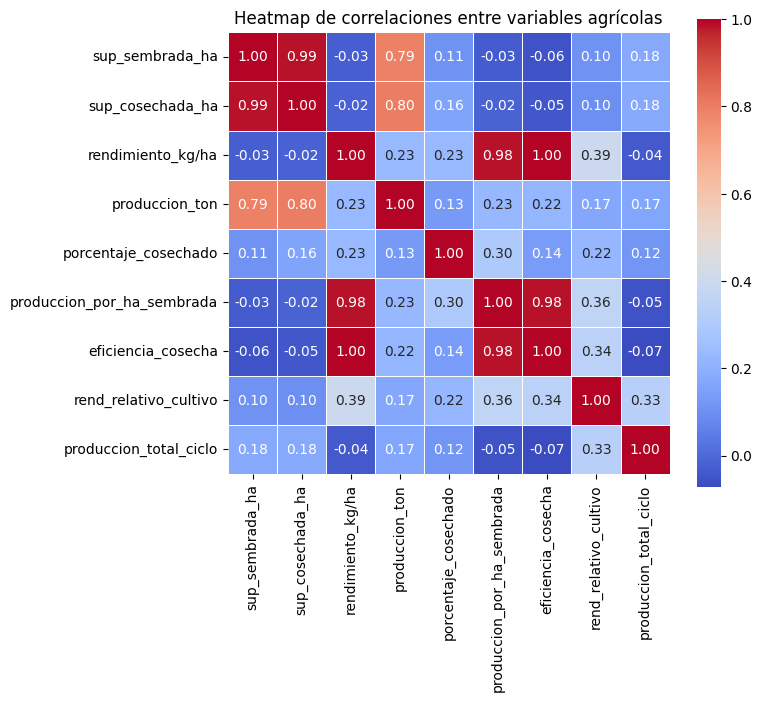

In [ ]:
# Seleccionar las columnas numéricas para el heatmap
variables = [
    'sup_sembrada_ha',
    'sup_cosechada_ha',
    'rendimiento_kg/ha',
    'produccion_ton',
    'porcentaje_cosechado',
    'produccion_por_ha_sembrada',
    'eficiencia_cosecha',
    'rend_relativo_cultivo',
    'produccion_total_ciclo'
]

# Subset con las columnas de interés
subset = ea[variables]

# Calcular la matriz de correlación
correlation_matrix = subset.corr()

# Crear el heatmap
plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True, linewidths=0.5)

plt.title("Heatmap de correlaciones entre variables agrícolas")
plt.tight_layout()
plt.show()

Según el heatmap, las features que están correlacionadas son:

 * sup_sembrada_ha - produccion_ton
 * sup_cosechada_ha - produccion_ton  
 * sup_cosechada_ha - sup_sembrada_ha
 * producción_por_ha_sembrada - rendimiento_kg/ha
 * eficiencia_cosecha - produccion_por_ha_sembrada




### Análisis por provincia

<ipython-input-40-c88d93ecdffa>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='provincia_nombre', y='rendimiento_kg/ha', data=prov_rend, palette=palette)


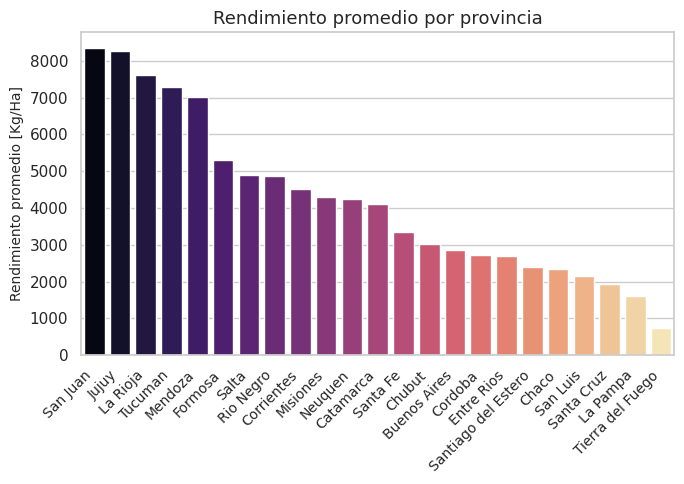

In [ ]:
# Calcular el rendimiento promedio por provincia
prov_rend = ea.groupby('provincia_nombre')['rendimiento_kg/ha'].mean().sort_values(ascending=False).reset_index()

# Estilo
sns.set(style="whitegrid")

# Crear gráfico
plt.figure(figsize=(7, 5))
palette = sns.color_palette("magma", len(prov_rend))
sns.barplot(x='provincia_nombre', y='rendimiento_kg/ha', data=prov_rend, palette=palette)

# Títulos y etiquetas
plt.title('Rendimiento promedio por provincia', fontsize=13)
plt.ylabel('Rendimiento promedio [Kg/Ha]', fontsize=10)
plt.xlabel('')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

La provincia que mayores rendimientos registró entre el periodo 1969 a 2023 es San Juan.

La provincia que menos rendimientos registró para el mismo período es Tierra del Fuego.

<ipython-input-41-6a2f54b963a7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ea_max_prov['anio'] = ea_max_prov['ciclo'].str.extract(r'(\d{4})').astype(int)


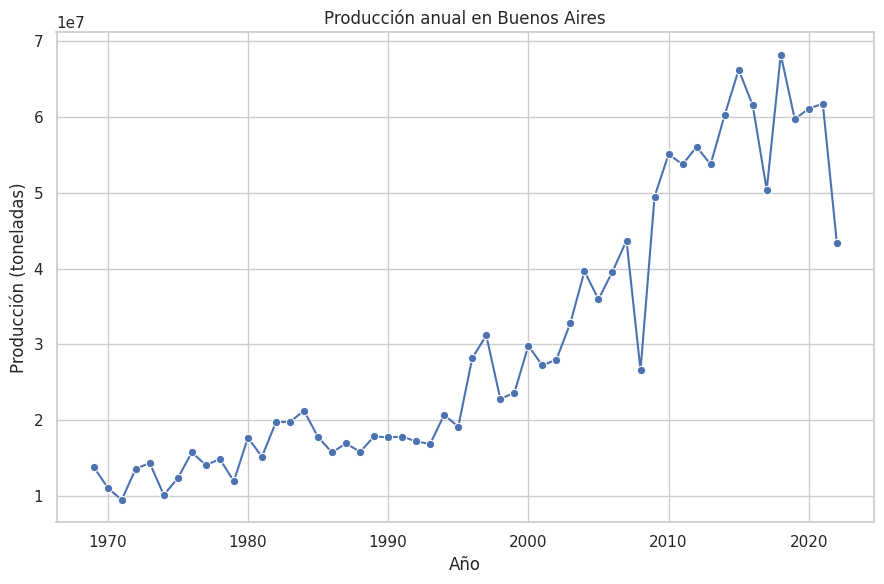

In [ ]:
# Provincia que mayor produccion total registró y la variación a lo largo del tiempo
prov_max = ea.groupby('provincia_nombre')['produccion_ton'].sum().idxmax()
ea_max_prov = ea[ea['provincia_nombre'] == prov_max]
ea_max_prov['anio'] = ea_max_prov['ciclo'].str.extract(r'(\d{4})').astype(int)
produccion_anual = ea_max_prov.groupby('anio')['produccion_ton'].sum().reset_index()
plt.figure(figsize=(9, 6))
sns.lineplot(data=produccion_anual, x=produccion_anual.columns[0], y='produccion_ton', marker='o')
plt.title(f'Producción anual en {prov_max}')
plt.ylabel('Producción (toneladas)')
plt.xlabel('Año')
plt.grid(True)
plt.tight_layout()
plt.show()

Buenos Aires es la provincia que mayor producción registro en el periodo de análisis.
Se observa un crecimiento constante a lo largo del tiempo. Excepto el mínimo cerca del año 2010, que se analizara en detalle más adelante.

<ipython-input-42-7e06f0f9fce6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=produccion_por_cultivo, x='cultivo', y='produccion_ton', palette='magma')


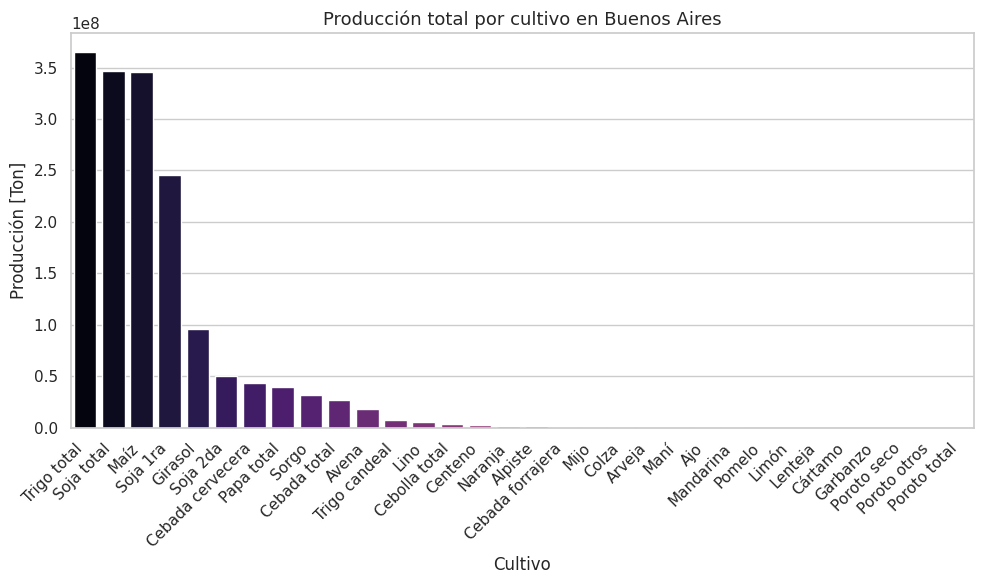

In [ ]:
# Visualizar produccion por cultivo para la provincia que registra mayor produccion total
produccion_por_cultivo = (ea_max_prov.groupby('cultivo')['produccion_ton'].sum().sort_values(ascending=False).reset_index())
plt.figure(figsize=(10, 6))
sns.barplot(data=produccion_por_cultivo, x='cultivo', y='produccion_ton', palette='magma')
plt.title(f'Producción total por cultivo en {prov_max}', fontsize=13)
plt.ylabel('Producción [Ton]')
plt.xlabel('Cultivo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Buenos Aires tiene produccion de Trigo total, Soja total y Maiz practicamente en proporciones iguales. Los demás cultivos parecen aportar la menor parte de la producción agrícola en esta provincia.

### Análisis por región

<ipython-input-43-d610a7ce1037>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ea, x='region', y='produccion_ton', palette='magma')


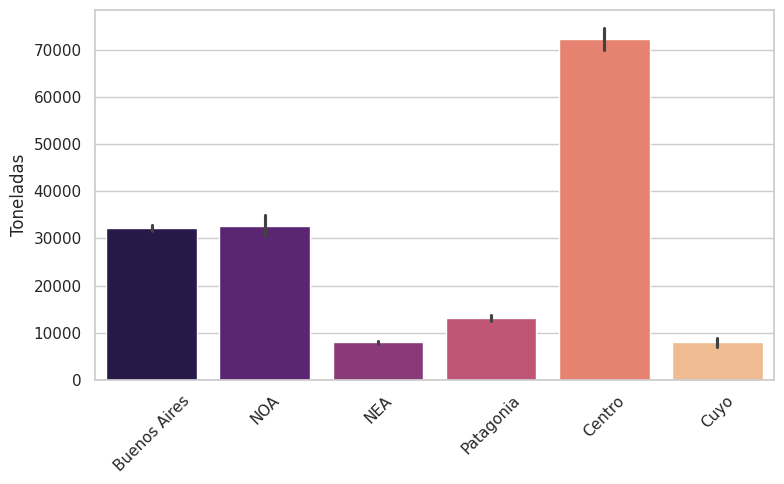

In [ ]:
# Producción por region
plt.figure(figsize=(8, 5))
sns.barplot(data=ea, x='region', y='produccion_ton', palette='magma')

plt.ylabel('Toneladas')
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La región con mayor producción es CENTRO.

<ipython-input-44-9db76f409e97>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ea, x='region', y='rendimiento_kg/ha', palette='magma')


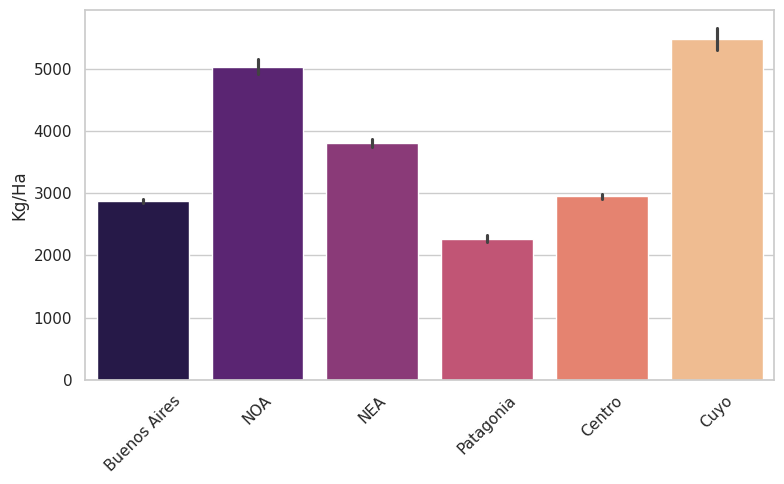

In [ ]:
# Rendimiento por region
plt.figure(figsize=(8, 5))
sns.barplot(data=ea, x='region', y='rendimiento_kg/ha', palette='magma')

plt.ylabel('Kg/Ha')
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Cuyo es la región que presenta el mayor rendimiento.

<ipython-input-45-296c0929e26f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ea, x='region', y='produccion_total_ciclo', palette='magma')


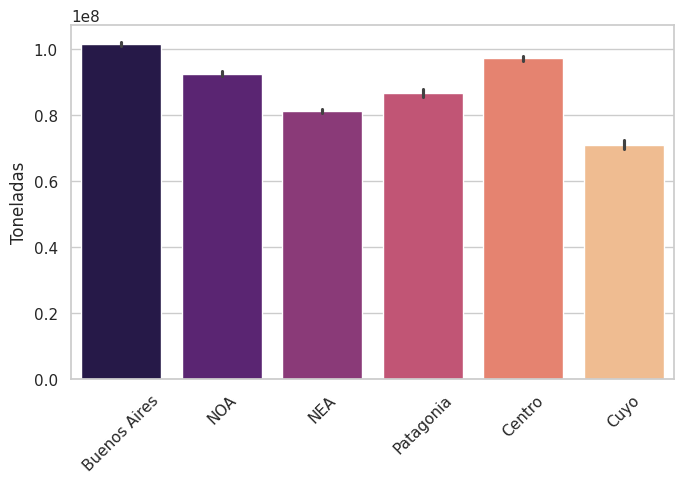

In [ ]:
# Producción total por ciclo por region
plt.figure(figsize=(7, 5))
sns.barplot(data=ea, x='region', y='produccion_total_ciclo', palette='magma')

plt.ylabel('Toneladas')
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En cuanto a la producción por ciclo por región, Buenos Aires tiene el mayor valor seguido de la región Centro.

<ipython-input-46-4232f67e0aa4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ea, x='region', y='porcentaje_cosechado', palette='magma')


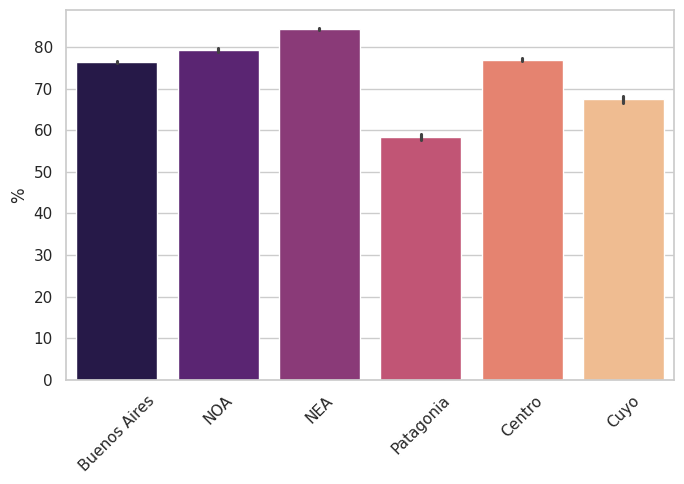

In [ ]:
# Producción total por ciclo por region
plt.figure(figsize=(7, 5))
sns.barplot(data=ea, x='region', y='porcentaje_cosechado', palette='magma')

plt.ylabel('%')
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La producción total por ciclo por región la encabeza el noreste argentino (NEA).

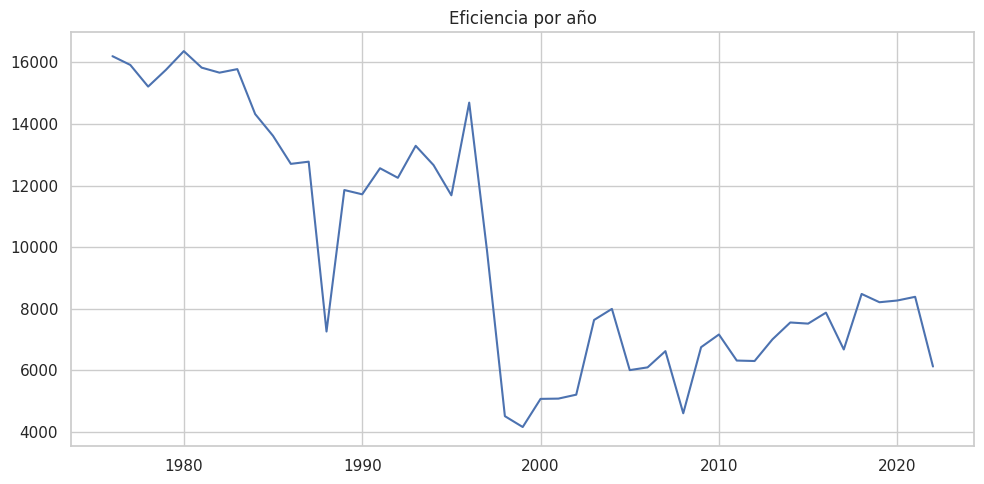

In [ ]:
# La feature 'ciclo' tiene el formato '1969/1970', tomamos el primer año
ea['anio'] = ea['ciclo'].str[:4].astype(int)

# Producción total por año nivel nacional
ea.groupby('anio')['eficiencia_cosecha'].sum().plot(kind='line', figsize=(10, 5), title='Eficiencia por año')
plt.ylabel('')
plt.xlabel('')
plt.grid(True)
plt.tight_layout()
plt.show()

Se observan varios cambios de la eficiencia a través del tiempo.

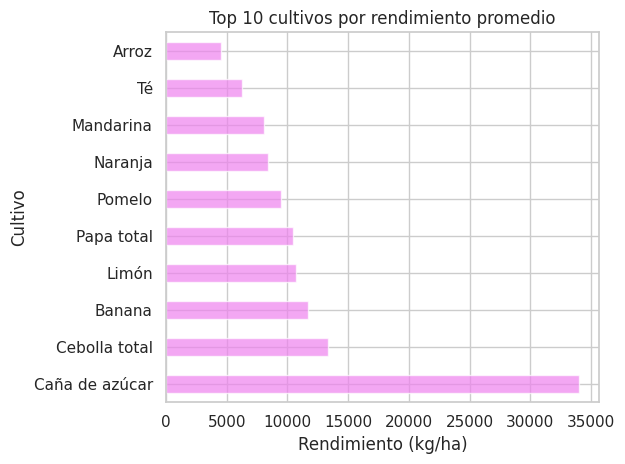

In [ ]:
# Promedio de rendimiento por cultivo
rend_cultivo = ea.groupby('cultivo')['rendimiento_kg/ha'].mean().sort_values(ascending=False).head(10)

# Gráfico
rend_cultivo.plot(kind='barh', title='Top 10 cultivos por rendimiento promedio',color='violet', alpha=0.7)
plt.xlabel('Rendimiento (kg/ha)')
plt.tight_layout()
plt.ylabel('Cultivo')
plt.show()

El cultivo "Caña de azucar" es el que mayor rendimiento generó para el período de análisis.

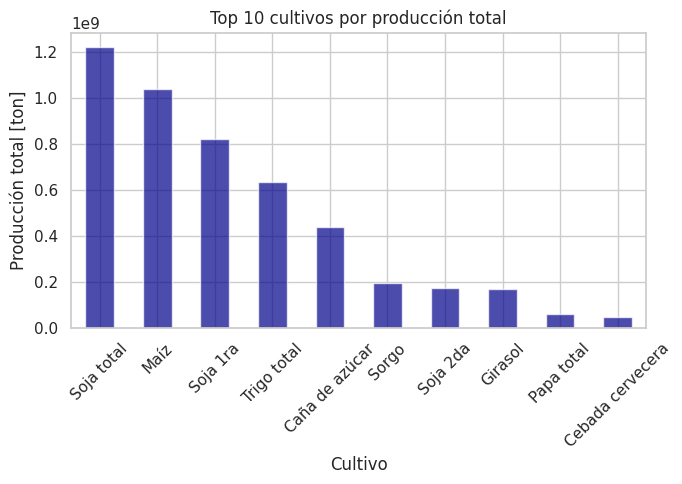

In [ ]:
cultivo_prod = ea.groupby('cultivo')['produccion_ton'].sum().sort_values(ascending=False).head(10)
cultivo_prod.plot(kind='bar', title='Top 10 cultivos por producción total', color='darkblue', figsize=(7, 5), alpha=0.7)
plt.ylabel('Producción total [ton]')
plt.xlabel('Cultivo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La Soja total es el cultivo que mayor producción registró.

### Mapas

Producción nacional por ciclo

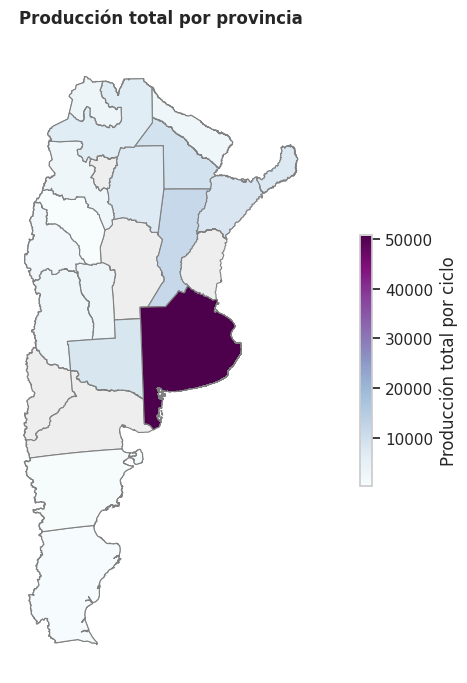

In [ ]:
import geopandas as gpd

# Leer shapefile
provincias = gpd.read_file('provinciaPolygon.shp')

# Eliminar Antártida
provincias = provincias[provincias['nam'] != 'Tierra del Fuego, Antártida e Islas del Atlántico Sur']

# Reproyectar para que el mapa tenga forma clásica
provincias = provincias.to_crs(epsg=5347)

# Agrupar producción total por provincia
conteo = ea.groupby('provincia_nombre').size().reset_index(name='produccion_total_ciclo')

# Merge LEFT para conservar provincias sin datos
provinciasf = provincias.merge(conteo, left_on='nam', right_on='provincia_nombre', how='left')

# Graficar mapa
fig, ax = plt.subplots(figsize=(10, 7))

# Fondo: provincias sin datos en gris claro
provinciasf.plot(
    ax=ax,
    color='#eeeeee',        # gris claro
    edgecolor='grey',
    linewidth=0.8
)

# Provincias con datos: escala de color
provinciasf.dropna(subset=['produccion_total_ciclo']).plot(
    ax=ax,
    column='produccion_total_ciclo',
    cmap='BuPu',
    edgecolor='grey',
    linewidth=0.8,
    legend=True,
    legend_kwds={
        'label': 'Producción total por ciclo',
        'shrink': 0.4
    }
)

# Estética final
ax.set_title('Producción total por provincia', fontsize=12, fontweight='bold')
ax.axis('off')
plt.tight_layout()
plt.show()



En el mapa se observa claramente lo visto antes, Buenos Aires tiene el mayor registro de la producción agrícola del país.

### Análisis de correlación

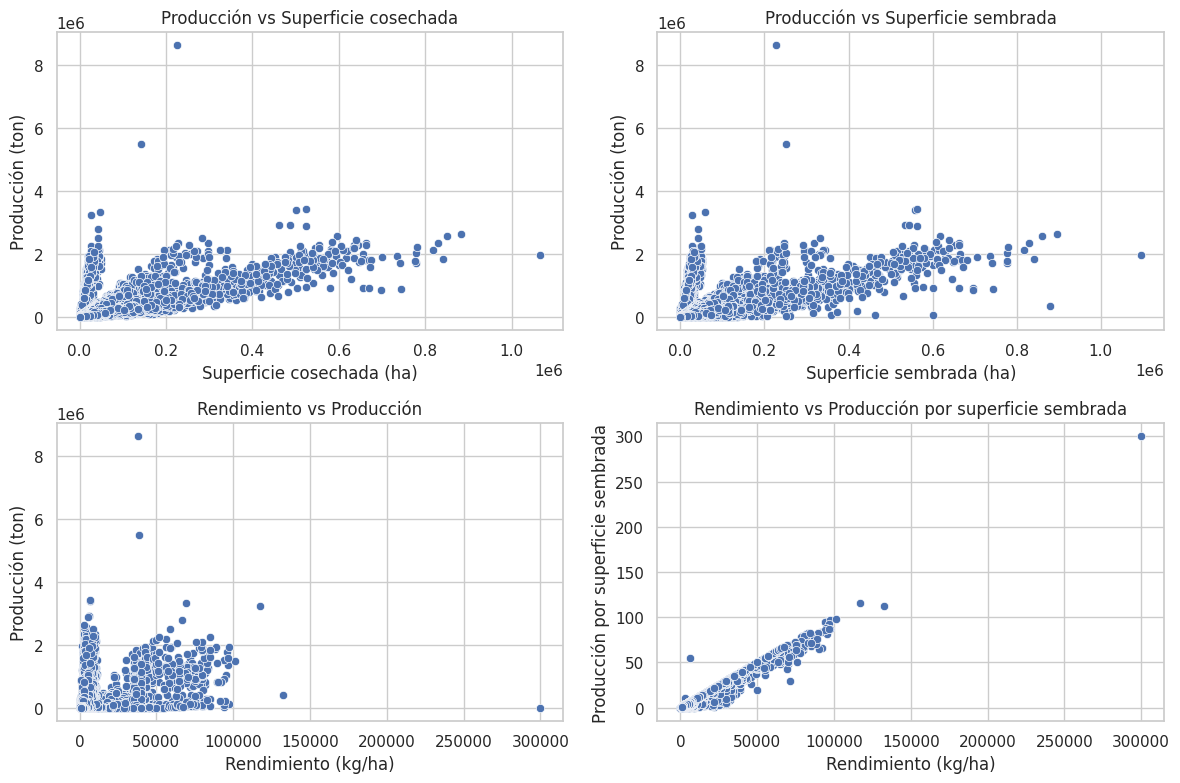

In [ ]:
# Graficos de correlación
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Correlacion entre sup_sembrada_ha - produccion_ton
sns.scatterplot(data=ea, x='sup_cosechada_ha', y='produccion_ton', ax=axs[0, 0])
sns.scatterplot(data=ea, x='sup_sembrada_ha', y='produccion_ton', ax=axs[0, 1])
sns.scatterplot(data=ea, x='rendimiento_kg/ha', y='produccion_ton', ax=axs[1, 0])
sns.scatterplot(data=ea, x='rendimiento_kg/ha', y='produccion_por_ha_sembrada', ax=axs[1, 1])

axs[0, 0].set_title('Producción vs Superficie cosechada')
axs[0, 0].set_xlabel('Superficie cosechada (ha)')
axs[0, 0].set_ylabel('Producción (ton)')

axs[0, 1].set_title('Producción vs Superficie sembrada')
axs[0, 1].set_xlabel('Superficie sembrada (ha)')
axs[0, 1].set_ylabel('Producción (ton)')

axs[1, 0].set_title('Rendimiento vs Producción')
axs[1, 0].set_xlabel('Rendimiento (kg/ha)')
axs[1, 0].set_ylabel('Producción (ton)')

axs[1, 1].set_title('Rendimiento vs Producción por superficie sembrada')
axs[1, 1].set_xlabel('Rendimiento (kg/ha)')
axs[1, 1].set_ylabel('Producción por superficie sembrada')

plt.grid(True)
plt.tight_layout()
plt.show()

Se observan subgrupos de correlacion que serán analizados a posteriori.